# Machine Learning for Classification
**Churn Prediction Project:**
The Churn Prediction project aims to identify customers who are likely to stop using a company’s services. Using **machine learning models**, it analyzes customer data such as demographics, service usage, and account information to predict churn probability. This helps businesses take proactive actions like personalized offers or better support to retain customers and reduce revenue loss.

We'll use logistic regression to predict churn


## Churn prediction project

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


## Data preparation

* Download the data, read it with pandas
* Look at the data
* Make column names and values look uniform
* Check if all the columns read correctly
* Check if the churn variable needs any preparation

Import all the libraries required.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Import the dataset 

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
!wget $data -O data-week-3.csv 

--2021-09-21 05:40:49--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.05s   

2021-09-21 05:40:49 (19.3 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Here, we can observe that the data having columns are imbalance (some upper case ,some lower case etc).

 So the below code coverts all the words in lower case. And replaces the spaces ' ' with '_'.

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

There are some things that are obviously off here.
1. Senior Citizen should be an object, but is represented by int64 instead. Seems like it's a 0 and 1 count.
2. Churn is an object - however, it's the thing that we're predicting. We should look further into it and convert churn into 0 or 1.
3. The totalcharges should be an int64 ,but it represents object means some of the data is not in numeric.


Here, in pandas we have function to convert them **to_numeric**.

In [7]:
# This allows us to look at the dataset columns instead. 
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [9]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df.totalcharges = df.totalcharges.fillna(0)

In [11]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [12]:
# Converting no/yes into 0/1 aka True or False but numerically 
df.churn = (df.churn == 'yes').astype(int)

## Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn
* In machine learning we should spilt the data as **80%, 20%, 20%.
  
  
  80 -training the model
  
  
  20 for validating
 
 
  20 for testing

In [13]:
# Recall from Notebook 2 that we did splits manually. With train_test_split, we can do it easily :) 
from sklearn.model_selection import train_test_split

In [14]:
# Recall that df_full_train consists of your training and validation dataset 
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Further splitting of training and val data 
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
# Resetting index of the 3 datasets 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
# Setting the y values.
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA

* Check missing values - if any of the colmuns have the missing values the accuray and predicting may decreases so we sholud fill the null values
* Look at the target variable (churn)
* Look at numerical and categorical variables - Divided the variables for the feature engineering

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

* Here the percentage of employee going to churn is 26% and not churn 73% 

In [21]:
# The normalize parameter is used so that we're able to see the percentage instead of the value counts
df_full_train.churn.value_counts(normalize=True)

0    0.730032
1    0.269968
Name: churn, dtype: float64

The mean is calculated by: 

# 1/n * summation of values

Since values are either 0 or 1, essentially we're counting the number of ones/n, which is the churn rate.

In [22]:
df_full_train.churn.mean()

0.26996805111821087

Recall df.dtypes gives us int64/float64, we're going to split it to numerical and categorical variables. 

However, there are categorical variables hiding as numerical variables, and we have to sort them accordingly.


In [23]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [24]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [25]:
# The nunique() functions shows how many unique values in a specfic category or specific categories.
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

##  Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable


**Feature Importance (in Churn Prediction Project):**
Feature importance tells us which features (customer details) are most responsible for predicting churn. For example, it shows whether factors like how long a customer has been with the company, their monthly bill, or their type of plan affect the chance of them leaving. This helps us understand which things matter the most and where the company should focus to keep customers happy.


* Churn rate
* Risk ratio
* Mutual information - later 


#### Churn rate

* Here we are comparing the churn rate between differrent groups .

In [26]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [27]:
# We can look at churn rate within different groups. For example, we can use gender
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [28]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [29]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [30]:
# Not much difference for female, as we can see that there is only a 0.6% difference. 
global_churn - churn_female

-0.006855983216553063

In [31]:
# Same for male 
global_churn - churn_male

0.006754520462819769

In [32]:
# We can also use the 'partner' group 
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [33]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [34]:
# Oh wow, the difference is huge! 6% of the dataset.
global_churn - churn_partner

0.06493474245795922

In [35]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

In [36]:
# 6%, still quite a big difference in percentage. 
global_churn - churn_no_partner

-0.05984095297455855

Since we're using the formula (global churn rate) - (group churn rate),

<0 would mean that there's a bigger likelihood to churn while >0 would mean that there's a smaller likelihood to churn as the having a positive churn rate would mean that the global churn rate is more than that of the group churn rate and vice versa. 

Of course, what really matters more is the magnitude/percentage of the churn rate before we look at the positivity/negativity of the churn rate.

#### Risk ratio
We can also look at the risk ratio itself, whereby a ratio of more than 1 would mean more likely to churn and a ratio of less than 1 would mean less likely to churn. 

A risk ratio of about 1 would mean that there is the same risk as the global churn rate.

In [37]:
churn_no_partner / global_churn

1.2216593879412643

In [38]:
churn_partner / global_churn

0.7594724924338315

This is SQL code. To explain the logic here:

We select a few columns from the data itself: 
1. Group (in this case Gender), 
2. the churn rate (aka mean of the churn), 
3. The churn rate difference & 
4. The risk ratio.

This is grouped by the certain group itself so as to see the difference and the risk ratio for each group, therefore the GROUP BY code at the end. 
```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

Now that we understand the logic, we have to convert this into python code.

In [39]:
from IPython.display import display

In [40]:
for c in categorical:
    # Printing category via for loop aka point 1
    print(c)
    
    # We create a new dataframe, including the churn rate and the churn count
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    
    # Then, we create a new column 'diff' and measure the churn rate difference
    df_group['diff'] = df_group['mean'] - global_churn
    
    #Lastly, we create another new column 'risk' and measure the risk ratio. 
    df_group['risk'] = df_group['mean'] / global_churn
    
    #Formatting things
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## Feature importance: Mutual information

Mutual information - concept from information theory, it tells us how much 
we can learn about one variable if we know the value of another

* https://en.wikipedia.org/wiki/Mutual_information

**Mutual Information (in Churn Prediction Project):**
Mutual information shows how much one feature (like monthly bill or contract type) helps us learn about the target — in this case, whether a customer will churn or not. If a feature has high mutual information, it means it gives useful clues for predicting churn. In simple words, it helps us find which customer details are most related to their decision to stay or leave.


To be specific, it measures the mutual dependence between two variables. 
Two variables are independent from each other if one variable does not affect another varaible, and is determined if P(A i B) = P(A) * P(B). 
If that does not hold true, the two variables are dependent. 

In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
# The value can tell us that there is some relation between the 'churn' variable and the 'contract' variable
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [43]:
# However, this values shows us that there is little to no relation at all. 
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [44]:
# The order of these factors do not matter.
mutual_info_score(df_full_train.contract, df_full_train.churn)

0.0983203874041556

In [45]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

0.009967689095399745

In [46]:
# MI scores between 'churn' column and other 'groups'
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [47]:
# .apply() allows us to apply a function to the dataframe/dataset itself
# in this case, we apply the previous function above to get the MI scores. 
mi = df_full_train[categorical].apply(mutual_info_churn_score)

mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## Feature importance: Correlation

How about numerical columns?

* Correlation coefficient - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

**Correlation Coefficient (in Churn Prediction Project):**
The correlation coefficient tells us how strongly two things are related. In churn prediction, it shows the relationship between customer features (like tenure, monthly charges, etc.) and the churn result. A **positive correlation** means both increase together, a **negative correlation** means one increases while the other decreases, and a **zero correlation** means there’s no clear link. This helps us understand which factors move together with churn.


Correlations are another way of showing the relationship between two variables. The correlation coefficient has a range of -1 <= r <= 1.

- For a negative correlation, it means that if one variable increases, the other variable will decrease.
- For a positive correlation, it means that if one variable increases, the other variable will increase along with it.

However, the magnitude is more important than the positivity of the correlation. The bigger the magnitude, the stronger the relationship between two variables. 

In [48]:
# We are using tenure for this case
df_full_train.tenure.max()

72

In [49]:
# These are the correlations between the numerical variables and the churn variable.
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [50]:
# We will be exploring tenure first.
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [51]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [52]:
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

As we can tell, with the increasing of tenure, there will be an decrease in the percentage of churn. This demonstrates a negative correlation between the two variables. 

In [53]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

0.08795411089866156

In [54]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

0.18340943683409436

In [55]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

0.32499341585462205

We can tell now that with the increase of monthly charges, there will be an increase in the percentage of churn. This demonstrates a positive correlation between the two variables. 

## One-hot encoding

**One Hot Encoding (in Churn Prediction Project):**
One Hot Encoding is a method used to convert **categorical data** (like “Male” or “Female”, “Yes” or “No”) into **numbers** so that the machine learning model can understand them. It creates new columns for each category and marks them with **1 or 0**.
For example, if “Contract Type” has values like *Monthly*, *Yearly*, it becomes two columns — **Contract_Monthly** and **Contract_Yearly** — with 1 showing which type the customer has. This helps the model use text data effectively for predictions.


* Use Scikit-Learn to encode categorical features

In [56]:
from sklearn.feature_extraction import DictVectorizer

In [57]:
# Here's some code to make more sense of the process first. 
# We have categorical variables like male & female in gender, month-to-month, one_year & two_year in contract.
df_train[['gender','contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [58]:
# We are using a dictionary vectorizer to make vectors out of a dictionary.
# However, the dictionary has to be saved such that each input consists of the gender and contract.
# Basically not like the code below.
df_train[['gender','contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [59]:
# This is how we would have to save it, with the orient 'records'.
test = df_train[['gender','contract']].iloc[:100].to_dict(orient = 'records')

# Feel free to delete the # to see the dictionary in its proper form.
# test

**DictVectorizer (in Churn Prediction Project):**
DictVectorizer is a tool in Python (from **scikit-learn**) that automatically converts **dictionary data** — where each customer’s details are stored as key–value pairs — into **numerical form** so that machine learning models can understand it.

For example, a customer record like
`{"Gender": "Male", "Contract": "Monthly"}`
is turned into numeric columns such as **Gender_Male = 1**, **Contract_Monthly = 1**.

It works just like One Hot Encoding but is very useful when the data is in dictionary format.


In [60]:
# Fitting and transforming the data
dv = DictVectorizer(sparse=False)
test = dv.fit_transform(test)

In [61]:
# If you want to take a look at the array after it has been fit and transformed
# test

In [62]:
# The features are in order, aka month-to-month is the first column, one_year is the second column, etc.
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [63]:
# Let's add in a numerical column to see what happens when we vectorize it
test_2 = df_train[['gender','contract', 'tenure']].iloc[:100].to_dict(orient = 'records')

In [64]:
test_2 = dv.fit_transform(test_2)
test

# We can tell from the output that nothing really happens to it.
# Therefore, we can conclude that nothing will happen to numerical variables once we vectorise it! 

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [65]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [66]:
test_3 = df_train[['gender','contract']].iloc[:100]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown = 'ignore')
test_3 = enc.fit_transform(test_3)

In [67]:
test_3_display = pd.DataFrame(test_3.toarray())
test_3_display

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
95,0.0,1.0,0.0,1.0,0.0
96,1.0,0.0,1.0,0.0,0.0
97,0.0,1.0,1.0,0.0,0.0
98,0.0,1.0,0.0,1.0,0.0


## Logistic regression


**Binary Classification (in Churn Prediction Project):**
Binary classification is a type of machine learning task where the model predicts **one of two possible outcomes**. In the churn prediction project, the two outcomes are usually:

* **1 (Yes)** – The customer will churn (leave).
* **0 (No)** – The customer will not churn (stay).

The model learns from past customer data and then predicts whether a new customer belongs to one of these two classes.



**Linear Regression vs Logistic Regression (in Churn Prediction Project):**

* **Linear Regression:**
  It is used to predict **continuous values** (numbers). For example, predicting a customer’s monthly bill amount. It gives results like 50, 75.5, or 120 — any real number.

* **Logistic Regression:**
  It is used to predict **categories or classes**, especially **Yes/No** type outcomes. In churn prediction, it helps decide whether a customer will **churn (1)** or **not churn (0)**. It uses a special function called the **sigmoid function** to convert numbers into probabilities between 0 and 1.

👉 **In simple terms:**

* Linear Regression → Predicts numbers.
* Logistic Regression → Predicts categories (like churn or not churn).


In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [69]:
# linspace() gives 51 evenly spaced out numbers from the range (-7, 7).
z = np.linspace(-7, 7, 51)

In [70]:
# Very extreme values usually lie towards 0 or 1, depending on the positivity/negativity of the number
# You can tell from -10 onwards whereby the value, when rounded to 5 decimal places, leads to 0.
# Same goes for 10 onwards, whereby the value leads to 1.

values = [-1000, -100, -50, -10, -7.5, -5, -3, -1, 0, 1, 3, 5, 7.5, 10, 50, 100, 1000]

for value in values:
    print(round(sigmoid(value),5))

0.0
0.0
0.0
5e-05
0.00055
0.00669
0.04743
0.26894
0.5
0.73106
0.95257
0.99331
0.99945
0.99995
1.0
1.0
1.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


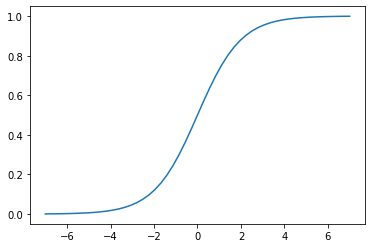

In [71]:
plt.plot(z, sigmoid(z))



Here’s a clear explanation:

* `w0` → This is the **bias (intercept)** term — it’s a constant added to every prediction.
* `w` → This is a list or array of **weights (coefficients)** for each feature.
* `xi` → This represents one **input data point** (a list of feature values).

🔹 **Working:**
The function multiplies each feature value `xi[j]` by its corresponding weight `w[j]` and adds them all together with the bias `w0`.

**Mathematically:**
[
y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
]

**Example:**
If `w0 = 2`, `w = [3, 4]`, and `xi = [1, 2]`,
then
`y = 2 + (3*1) + (4*2) = 13`

So this function returns the **predicted value (y)** for that input data point.


In [72]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

This function is the **prediction step of Logistic Regression**, built similarly to Linear Regression — but with one key difference: it applies the **sigmoid function** to convert the output into a **probability**.

Here’s the step-by-step explanation:

* `w0` → the **bias (intercept)** term.
* `w` → the list of **weights (coefficients)** for each feature.
* `xi` → one **input data point** (list of feature values).
* `sigmoid(score)` → converts the linear output into a value between **0 and 1**, representing the **probability** of belonging to class 1 (for example, “churn”).

🔹 **Working:**

1. Calculate the **linear score** (like in linear regression):
   [
   \text{score} = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n
   ]
2. Apply the **sigmoid function** to this score:
   [
   \text{result} = \frac{1}{1 + e^{-\text{score}}}
   ]
   This squeezes the value into the range (0,1).

**Example:**
If `w0 = -2`, `w = [1, 0.5]`, and `xi = [3, 2]`,
then
`score = -2 + (1*3) + (0.5*2) = 2`
`result = sigmoid(2) ≈ 0.88`

So the model predicts an **88% probability** that the input belongs to class 1 (e.g., the customer will churn).


In [73]:
# Logistic Regressions works just like linear regression WITH the sigmoid function applied to the scores.
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

## Training logistic regression with Scikit-Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(solver='lbfgs')

# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression()

In [76]:
# Bias 
model.intercept_[0]

-0.10903322824505347

In [77]:
# Weights
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.317, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [78]:
# Hard predictions
model.predict(X_train) 

array([0, 1, 1, ..., 1, 0, 1])

In [79]:
# Soft predictions
# predict_proba will give us the probability of churn being 0, and churn being 1.
# The probabilities in each element of the array add up to 1, like [0.98945691, 0.01054309] for example
y_pred = model.predict_proba(X_val)
y_pred

array([[0.99100335, 0.00899665],
       [0.79546956, 0.20453044],
       [0.78777242, 0.21222758],
       ...,
       [0.86361265, 0.13638735],
       [0.20023891, 0.79976109],
       [0.16259991, 0.83740009]])

In [80]:
# We only want the probability of churn being 1. 
y_pred[:, 1]

array([0.00899665, 0.20453044, 0.21222758, ..., 0.13638735, 0.79976109,
       0.83740009])

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]

In [82]:
# Ultimately, we have decided that 0.5 will be the threshold whereby we consider churn to be 1. 
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [83]:
# Calculating the accuracy of the model itself. 0.803, not bad! 
(y_val == churn_decision).mean()

0.8034066713981547

In [84]:
# Creation of prediction dataframe

df_pred = pd.DataFrame()

# Probability of the customer churning
df_pred['probability'] = y_pred

# Convert into 0 or 1, basically y_pred in a typical situation
df_pred['prediction'] = churn_decision.astype(int)

# y_val data being converted into a column 
df_pred['actual'] = y_val

In [85]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [86]:
df_pred.correct.mean()

0.8034066713981547

In [87]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

## Model interpretation

**Model Interpretation (in Churn Prediction Project):**
Model interpretation means understanding **how and why** the machine learning model makes its predictions. It helps us know which features (customer details) have the biggest effect on churn.

In **Logistic Regression**, each feature has a **weight (coefficient)**:

* A **positive weight** means the feature **increases the chance of churn**.
  (Example: higher monthly charges → higher churn probability)
* A **negative weight** means the feature **reduces the chance of churn**.
  (Example: longer contract period → lower churn probability)
* A **larger value** (in either direction) means the feature has a **stronger impact**.

By interpreting these weights, we can explain model predictions in simple business terms — for example, “Customers with short contracts and high bills are more likely to leave,” helping companies take action to retain them.


* Look at the coefficients
* Train a smaller model with fewer features

In [88]:
a = [1, 2, 3, 4]
b = 'abcd'

In [89]:
# Demonstrating how dict(zip()) works
dict(zip(a, b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [90]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [91]:
# We're going to be working with a smaller model instead, with fewer features 
small = ['contract', 'tenure', 'monthlycharges']

In [92]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [93]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [94]:
# Fitting to DictVectorizer
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [95]:
# Feature names
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [96]:
X_train_small = dv_small.transform(dicts_train_small)

In [97]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [98]:
# w0 
w0 = model_small.intercept_[0]
w0

-2.476775658265233

In [99]:
# w1 to w5 
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [100]:
dict(zip(dv_small.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [101]:
# Remember, logistic regression is just like linear regression just with the added Sigmoid function.

-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

In [102]:
sigmoid(_)

0.030090303318277657

## Using the model

**Testing the Model (in Churn Prediction Project):**
After training the Logistic Regression model, we test it using **new customer data** to see how well it predicts churn. Each new data point (like monthly charges and tenure) is given to the model, which calculates a **score** using the learned weights and bias. This score is passed through the **sigmoid function** to get a **probability between 0 and 1**.

If the probability is **greater than 0.5**, the model predicts the customer will **churn (leave)**; otherwise, it predicts the customer will **stay**. This helps us understand how the model performs on unseen data and how likely each customer is to churn.


In [103]:
# Preparation of the data to be vectorized 
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [104]:
dv = DictVectorizer(sparse=False)

# Splitting of the data to X and y 
X_full_train = dv.fit_transform(dicts_full_train)

In [105]:

y_full_train = df_full_train.churn.values

In [106]:
# Fitting into model
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [107]:
# Preparation of test data to be vectorized 
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [108]:
X_test = dv.transform(dicts_test)

In [109]:
# Predictions from X_test
y_pred = model.predict_proba(X_test)[:, 1]

In [110]:
churn_decision = (y_pred >= 0.5)

In [111]:
(churn_decision == y_test).mean()

0.815471965933286

In [112]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [113]:
# Getting the info of the customer itself, so that we can calculate the probability.
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [114]:
X_small = dv.transform([customer])

In [115]:
model.predict_proba(X_small)[0, 1]

0.5968852088244745

In [116]:
y_test[-1]

1

## Summary

* Feature importance - risk, mutual information, correlation
* One-hot encoding can be implemented with `DictVectorizer`
* Logistic regression - linear model like linear regression
* Output of log reg - probability
* Interpretation of weights is similar to linear regression

**Churn Prediction Model — Summary Description:**

The **Churn Prediction Model** is a machine learning project that helps a company identify which customers are likely to stop using its services. The model is built using **Logistic Regression**, a type of algorithm used for **binary classification** (Yes/No or 1/0 outcomes).

In this project, customer data such as **tenure**, **monthly charges**, and **contract type** are analyzed. Before training, data is cleaned and converted into numeric form using techniques like **One Hot Encoding** and **DictVectorizer**. Important features are identified through methods like **Correlation Coefficient**, **Mutual Information**, and **Feature Importance**.

The Logistic Regression model learns the relationship between customer features and their churn behavior. After training, it predicts a **probability** (between 0 and 1) that shows how likely a customer is to churn. If the probability is above 0.5, the customer is predicted to **churn (1)**; otherwise, **stay (0)**.

By testing the model with new customer data, businesses can identify at-risk customers early and take steps like offering discounts or improving service.
In short, this project helps companies **reduce customer loss** and **improve retention strategies** using machine learning.


##  Explore more


Use scikit-learn in projects

Other projects

* Lead scoring - https://www.kaggle.com/ashydv/leads-dataset
* Default prediction - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

